# **01. Konversi Pandas Dataframe**

In [94]:
import os
os.listdir('sample_data')

['anscombe.json',
 'README.md',
 'california_housing_test.csv',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_train.csv']

In [95]:
import pandas as pd
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# **02. Sklearn Train Test Split**

In [96]:
import sklearn
from sklearn import datasets

In [97]:
# load iris dataset
iris = datasets.load_iris()

In [98]:
# pisahkan atribut dan label pada iris dataset
x=iris.data
y=iris.target

In [99]:
from sklearn.model_selection import train_test_split
 
# membagi dataset menjadi training dan testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# menghitung panjang/jumlah data pada masing-masing direktori split
print(len(x))
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

150
120
30
120
30


# **03. Sklearn Cross Validation Split**

In [100]:
import sklearn
from sklearn import datasets
 
# load iris dataset
iris = datasets.load_iris()

In [101]:
# bagi atribut dan target, assign ke dalam variable x, y
x=iris.data
y=iris.target

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
 
clf = tree.DecisionTreeClassifier()

In [103]:
# mengevaluasi performa model dengan cross_val_score
scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

# **04. Sklearn Decission Tree**

**Tahapan Latihan**

Dataset iris terdiri dari 4 atribut yaitu panjang sepal, lebar sepal, panjang petal, dan lebar petal. Terdapat 3 kelas target pada dataset ini. Data ini dipakai untuk masalah klasifikasi, di mana kita bisa memprediksi spesies dari sebuah bunga berdasarkan atribut-atribut yang diberikan.

Tahapan yang ada pada latihan ini antara lain:

1. Ubah dataset ke dalam dataframe.
2. Hapus kolom 'Id' pada dataframe dan pisahkan antara atribut dan label.
3. Buat dan latih model Decision Tree.
4. Lakukan prediksi dengan model yang telah dilatih.
5. Visualisasi model Decision Tree yang telah dilatih.

Dataset dapat anda unduh di tautan [berikut](https://www.kaggle.com/uciml/iris)

In [104]:
import pandas as pd
from sklearn.datasets import load_iris
 
# membaca file iris.csv
iris = pd.read_csv('https://drive.google.com/uc?id=1ESjH0OBnqXmDkAmXXIRCYjQHTnVtAukC')

In [105]:
# melihat informasi dataset pada 5 baris pertama
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

In [107]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

In [108]:
from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# melakukan pelatihan model terhadap data
tree_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
tree_model.predict([[6.2, 3.4, 5.4, 2.3]])

array(['Iris-virginica'], dtype=object)

In [110]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

Untuk melihat visualisasi decision tree kita bisa mengonversi dot file ke dalam file png, dengan menggunakan situs konversi berkas berikut ini : https://onlineconvertfree.com/converter/images/.

atau dengan

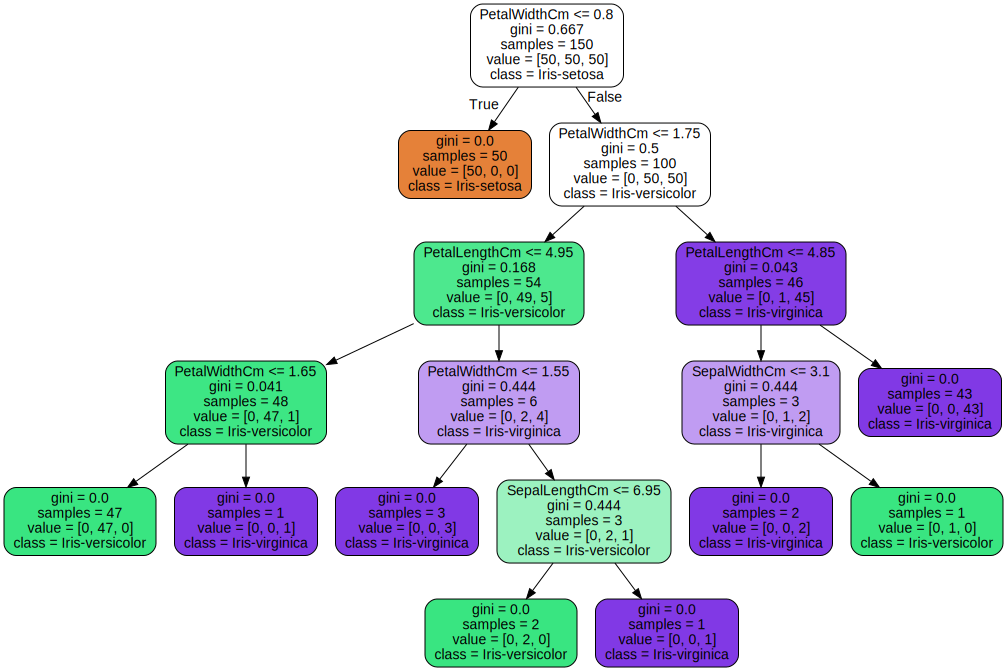

In [111]:
from graphviz import Source
s = Source.from_file("iris_tree.dot")
s

# **05. Sklearn Linear Regression**

**Tujuan**

Pada latihan kali ini kita akan memprediksi harga rumah berdasarkan jumlah kamar.

**Tahapan Latihan**

Berikut adalah tahapan latihan yang akan Anda lakukan:

Impor library yang dibutuhkan.
Buat dataset dummy dengan Numpy Array.
Buat plot dari model.

In [112]:
import numpy as np

# buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

# data harga rummah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

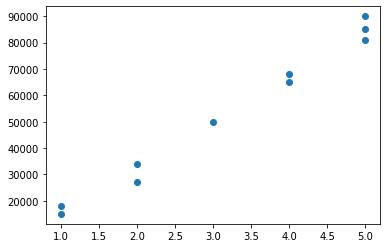

In [113]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

In [114]:
from sklearn.linear_model import LinearRegression

# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

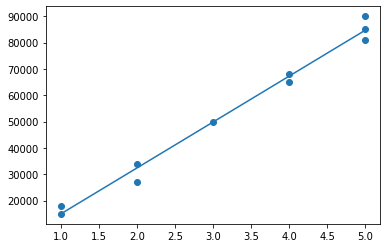

In [115]:
# menampilkan plot hubungan antara jumlah kamar dan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

# **06. Sklearn Logistic Regression**

**Tujuan**

Pada latihan ini kita akan menggunakan logistic regression untuk memprediksi apakah seseorang akan membeli setelah melihat iklan sebuah produk. 

**Tahapan Latihan**

Tahapan yang dilalui dalam latihan kali ini adalah sebagai berikut:

1. Ubah dataset menjadi Dataframe.
2. Pisahkan atribut dan label.
3. Hapus kolom 'User ID'.
4. Latih model Logistic Regression.
5. Evaluasi akurasi model.

Dataset untuk latihan bisa Anda unduh pada tautan [berikut](https://www.kaggle.com/dragonheir/logistic-regression).

In [116]:
import pandas as pd

df = pd.read_csv('https://drive.google.com/uc?id=1V3Yxmx0LEetP0Io1lJrSRzc-vg_XyRpz')

In [117]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [119]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])

# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [120]:
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']

X = data[predictions]
y = data['Purchased'] 

In [121]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [122]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)
print(len(y_test))

80


In [123]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
#uji akurasi model
model.score(X_test, y_test)

0.825

# **07. Sklearn K-means Clustering**

**Tujuan**

Pada latihan kali ini, Anda akan belajar membuat model unsupervised learning dengan teknik K-Means Clustering.  

**Tahapan Latihan**

Tahapan pada latihan kali ini adalah sebagai berikut:

1. Konversi data menjadi Dataframe.
2. Lakukan preprocessing data.
3. Hilangkan kolom 'CustomerID' dan 'gender'.
4. Latih model K-Means.
5. Buat plot untuk Elbow dan Cluster.

Dataset bisa Anda dapatkan pada tautan [berikut](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

In [125]:
import pandas as pd

# ubah file csv menjadi dataframe
df = pd.read_csv('https://drive.google.com/uc?id=1KJux-tHvHR6i97o6ye95yQtEEfisAGNn')

# tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [126]:
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [127]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
# Di tahap ini juga kita akan menghilangkan kolom Customer ID dan gender karena kurang relevan untuk proses clustering
X = df.drop(['CustomerID', 'gender'], axis=1)

# membuat list yang berisi inertia (berisi iersia dari nilai K antara 1 sampai 11)
# menentukan nilai K yang optimal dengan metode Elbow
# Inersia memberi tahu seberapa jauh jarak setiap sampel pada sebuah klaster. 
# Semakin kecil inersia maka semakin baik karena jarak setiap sampel pada sebuah klaster lebih berdekatan.
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

clusters

[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51118.949931647294,
 44309.83640371744,
 40608.14164169164,
 37628.17805586655]

Text(0, 0.5, 'Inertia')

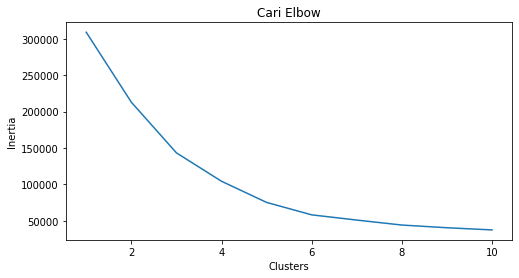

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


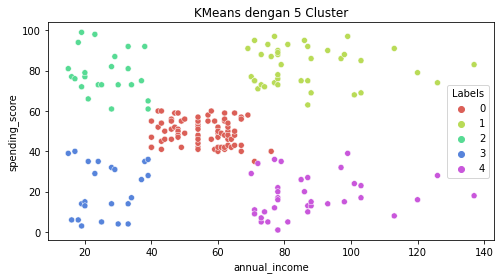

In [129]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

In [130]:
X

,age,annual_income,spending_score,Labels
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3
...,...,...,...,...
195,35,120,79,1
196,45,126,28,4
197,32,126,74,1
198,32,137,18,4


# **08. Sklearn PCA**

**Tujuan**

Pada latihan ini, kita akan berlatih mengimplementasi PCA dengan library SKLearn. 

**Tahapan Latihan**

Tahapan pada latihan ini sebagai berikut:

1. Bagi dataset.
2. Latih model tanpa PCA.
3. Latih model dengan PCA.
4. Evaluasi hasil kedua model.

In [131]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
atribut = iris.data
label = iris.target

# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2, random_state=1)

Kita akan menggunakan model Decision Tree dan menghitung berapa akurasinya tanpa menggunakan PCA. Akurasi tanpa PCA adalah 0.9666. Akurasi dari model Anda mungkin berbeda dengan keluaran di bawah.

In [132]:
from sklearn import tree

# menghitung akurasi model tanpa PCA
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

0.9666666666666667

Kemudian kita akan menggunakan PCA dan menghitung variance dari setiap atribut. Hasilnya adalah 1 atribut memiliki variance sebesar 0.919, yang berarti atribut tersebut menyimpan informasi yang tinggi dan jauh lebih signifikan dari atribut lain. 

In [133]:
from sklearn.decomposition import PCA

# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)

# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)

# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

Melihat dari variance sebelumnya kita bisa mengambil 2 principal component terbaik karena total variance nya adalah 0.969 yang sudah cukup tinggi.

In [134]:
# PCA dengan 2 principal component
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [135]:
# uji akurasi classifier

model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.9333333333333333

Dari percobaan di atas bisa kita lihat bahwa dengan hanya 2 principal component atau 2 atribut saja model masih memiliki akurasi yang tinggi. Dengan principal component kamu bisa mengurangi atribut yang kurang signifikan dalam prediksi dan mempercepat waktu pelatihan sebuah model machine learning.

# **09. Sklearn SVM untuk classification (SVC)**

**Tujuan**

Sekarang saatnya kita mencoba menggunakan model SVM yang tersedia di library SKLearn. Untuk latihan kali ini kita akan memakai dataset Pima Indian. Dataset ini dikumpulkan oleh National Institute of Diabetes and Digestive and Kidney Diseases.

**Tahapan Latihan**

Dataset berisi 8 kolom atribut dan 1 kolom label yang berisi 2 kelas yaitu 1 dan 0. Angka 1 menandakan bahwa orang tersebut positif diabetes dan 0 menandakan sebaliknya. Terdapat 768 sampel yang merupakan 768 pasien perempuan keturunan suku Indian Pima.

Model machine learning yang akan kita buat bertujuan untuk mengklasifikasikan apakah seorang pasien positif diabetes atau tidak

Tahapan latihan kali ini adalah:

1. Ubah data ke dalam Dataframe.
2. Bagi dataset.
3. Lakukan standarisasi.
4. Buat dan latih model.
5. Evaluasi model.

Tahap pertama yang perlu kita lakukan adalah mengunduh dataset Pima Indian Diabetes dari tautan [berikut](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [136]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [137]:
import pandas as pd

df = pd.read_csv('https://drive.google.com/uc?id=1WWrRGZPjim1igf6wpO6hWpndajWpOasH')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Kita lalu memisahkan antara atribut dan label pada dataframe.

In [139]:
df.columns[:8]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [140]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

Jika kita lihat, nilai-nilai pada dataset memiliki skala yang berbeda. Contohnya pada kolom Glucose dan kolom Diabetes Pedigree Function. Kita perlu mengubah nilai-nilai dari setiap atribut berada pada skala yang sama. Kita dapat mencoba menggunakan standarisasi dengan fungsi StandardScaler() dari SKLearn.

In [141]:
from sklearn.preprocessing import StandardScaler

# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [142]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [143]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [144]:
# menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7559055118110236

# **10. Sklearn Support Vector Regression (SVR)**

**Tujuan**

Setelah mengenal support vector regression, kita akan belajar menerapkan teknik tersebut ke dalam model ML dengan library SKLearn. 

**Tahapan Latihan**

Tahapan pada latihan kali ini adalah sebagai berikut:

1. Ubah data menjadi Dataframe.
2. Pisahkan atribut dan label.
3. Latih model SVR.
4. Buat plot dari model.

Dataset yang akan kita gunakan adalah data tentang lama kerja seseorang dan gajinya. Dataset ini dapat diunduh pada tautan[ berikut](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression).

In [145]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('https://drive.google.com/uc?id=1L0orD53kQWUujd8TtUY0JaZRg5rtazLK')

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [147]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Kemudian kita pisahkan antara atribut dan label yang ingin diprediksi. Ketika hanya terdapat satu atribut pada dataframe, maka atribut tersebut perlu diubah bentuknya agar bisa diterima oleh model dari library SKLearn. Untuk mengubah bentuk atribut kita membutuhkan library numpy

In [148]:
import numpy as np

# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = X[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [149]:
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model  = SVR(C=1000, gamma=0.05, kernel='rbf')

# melatih model dengan fungsi fit
model.fit(X,y)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

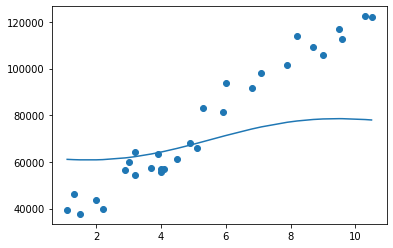

In [150]:
import matplotlib.pyplot as plt

# memvisualisasikan model
plt.scatter(X, y)
plt.plot(X, model.predict(X))

Hasil visualisasi menunjukkan bahwa model yang kita kembangkan, belum mampu menyesuaikan terhadap pola pada data dengan baik. Nah, pada modul berikutnya kita akan mencoba meningkatkan performa model kita dengan menggunakan grid search.

# **11. SKLearn with Grid Search**

Grid search memungkinkan kita menguji beberapa parameter sekaligus pada sebuah model. Contohnya kita bisa menguji beberapa jumlah cluster untuk sebuah model K-Means dan melihat bagaimana performa model K-Means terhadap nilai K yang berbeda. Untuk lebih memahami grid search, kita akan mencoba grid search menggunakan SKLearn.

**Tujuan**

Untuk latihan kali ini kita akan menggunakan grid search untuk mencari parameter terbaik pada sebuah model SVR. Dataset yang kita gunakan sama seperti di modul 3 yaitu dataset gaji. Pada latihan tersebut model belum mampu menyesuaikan pola pada data dengan baik. Tujuan kita adalah menggunakan grid search untuk mencari parameter yang lebih baik bagi model.

**Tahapan Latihan**

Tahapan latihan kali ini sebagai berikut:

1. Ubah dataset data menjadi Dataframe.
2. Definisikan parameter yang akan diuji.
3. Jalankan fungsi grid search.
4. Latih model dengan parameter terbaik hasil grid search.
5. buat plot dari model.

Pertama, unduh berkas "Salary_Data.csv", dari tautan [berikut](https://www.kaggle.com/vivinbarath/simple-linear-regression-for-salary-data) ini.

In [151]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('https://drive.google.com/uc?id=1L0orD53kQWUujd8TtUY0JaZRg5rtazLK')

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [153]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [154]:
import numpy as np

# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = X[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Selanjutnya, untuk menggunakan grid search, kita impor library GridSearchCV dari sklearn.model_selection. Lalu kita buat model yang ingin kita uji dengan grid search dalam hal ini model SVR. Kemudian kita buat sebuah python dictionary yang berisi nama parameter yang akan diuji, serta nilai-nilainya. Selanjutnya kita buat objek grid search dan mengisi parameter-parameternya. Parameter pertama adalah model yang akan kita uji. Parameter kedua adalah dictionary yang berisi kumpulan parameter dari model yang akan diuji. Terakhir kita panggil fungsi fit() pada objek grid search yang telah kita buat.

Setelah grid search mencari parameter terbaik pada model, kita bisa menampilkan parameter terbaik dengan memanggil atribut best_params_ dari objek grid search.

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X,y)

print("SVR GridSearch score: "+str(grid_search.best_score_))
print("SVR GridSearch params: ")
print(grid_search.best_params_)

SVR GridSearch score: 0.046902312105593216
SVR GridSearch params: 
{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [156]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

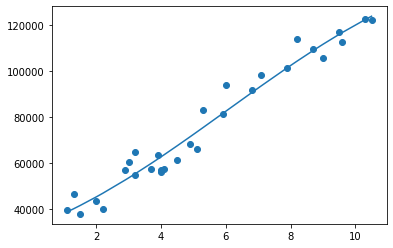

In [157]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

# **12. CNN Clean vs Messy Room**

**Tujuan**

Tahap awal sebelum kita membangun sebuah jaringan saraf tiruan adalah mem-framing problem. Pada tahap ini kita menentukan apa masalah yang ingin diselesaikan dan bagaimana implementasi dari jaringan saraf dapat menyelesaikan masalah tersebut. Setelah kita memahami masalah, kemudian kita dapat mengembangkan sebuah MLP sebagai sebuah solusi.

Pada latihan kali ini kita akan membuat sebuah model untuk mengklasifikasi gambar sebuah kamar dan memprediksi apakah kamar tersebut rapi atau berantakan. Pada akhir latihan Anda akan dapat menguji coba model ini dengan gambar kamar Anda sendiri. Keren, bukan?

**Tahapan Latihan**

Tentunya machine learning selalu membutuhkan data. Pada tahap awal kita perlu memahami data kita lebih lanjut. Beberapa hal yang perlu diketahui adalah format dari data, jumlah sampel, apakah dataset merupakan masalah regresi/klasifikasi, dan berapa jumlah label.

Untuk dataset yang kita gunakan memiliki 200 buah sampel untuk data latih. Terdapat 100 sampel gambar ruangan rapi dan 100 sampel gambar ruangan berantakan.

Tahapan latihan kali ini adalah:

1. Memastikan tensorflow yang digunakan di Watson Studio dan Google Colab adalah versi di atas 2.0.
2. Unduh dataset dan extract file dengan metode unzip.
3. Menampung direktori setiap kelas pada direktori train dan validasi ke dalam variabel.
4. Pre-processing data dengan image augmentation.
5. Mempersiapkan data latih yang akan dipelajari oleh model.
6. Membangun arsitektur model dengan CNN.
7. Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.
8. Prediksi gambar ruangan bersih dan ruangan rapi untuk mengetes model.

In [158]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [159]:
print(tf.__version__)

2.4.1


In [160]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-03-07 02:09:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  6.29MB/s    in 11s     

2021-03-07 02:10:11 (5.93 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [161]:
# melakukan ekstraksi pada file zip
# https://drive.google.com/uc?id=113vCKrBDql_Eu2bbXRfQ9Il-3l4EGp4z
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [162]:
print(train_dir)
print(validation_dir)

/tmp/images/train
/tmp/images/val


In [163]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [164]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [165]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

Langkah selanjutnya adalah kita membuat sebuah objek ImageDataGenerator untuk data training dan data testing. Image data generator adalah sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing yang akan diberikan ke model. Beberapa kemudahan yang disediakan Image data generator adalah, **preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar**.

Kode di bawah menunjukkan proses augmentasi gambar pada setiap sampel di dataset. Augmentasi gambar adalah teknik untuk menciptakan data-data baru dari data yang telah ada. Contoh augmentasi gambar adalah horizontal flip di mana gambar akan dibalikkan secara horizontal. 

In [166]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

Lalu kita dapat menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model.

In [167]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Setelah data telah siap, kita bisa membangun arsitektur sebuah CNN. Sebuah CNN pada keras mirip dengan MLP untuk klasifikasi fashion MNIST yang kita bahas sebelumnya. Perbedaannya hanya pada terdapatnya 2 lapis layer konvolusi dan max pooling. Anda tentu masih ingat bahwa fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar. Sedangkan layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan MLP lebih cepat.

In [168]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer.

In [169]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Setelah menentukan loss function dan optimizer pada CNN, kita dapat melatih model kita menggunakan metode fit. Dengan menggunakan image data generator, kita tidak perlu memasukkan parameter gambar dan labelnya. Image data generator secara otomatis melabeli sebuah gambar sesuai dengan direktori di mana ia disimpan. Contohnya sebuah gambar yang terdapat di direktori clean, secara otomatis akan diberi label “clean” oleh image data generator.

In [170]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 8s - loss: 0.7599 - accuracy: 0.4500 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/25
25/25 - 8s - loss: 0.6941 - accuracy: 0.5200 - val_loss: 0.6911 - val_accuracy: 0.7500
Epoch 3/25
25/25 - 8s - loss: 0.7358 - accuracy: 0.5300 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/25
25/25 - 7s - loss: 0.6908 - accuracy: 0.5100 - val_loss: 0.6802 - val_accuracy: 0.6500
Epoch 5/25
25/25 - 7s - loss: 0.6993 - accuracy: 0.4900 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 6/25
25/25 - 7s - loss: 0.7015 - accuracy: 0.5000 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 7/25
25/25 - 7s - loss: 0.6900 - accuracy: 0.5500 - val_loss: 0.6733 - val_accuracy: 0.5000
Epoch 8/25
25/25 - 7s - loss: 0.6734 - accuracy: 0.5300 - val_loss: 0.6431 - val_accuracy: 0.5000
Epoch 9/25
25/25 - 7s - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/25
25/25 - 7s - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 11/25
25/25 -

Saving 2.png to 2.png
2.png
messy


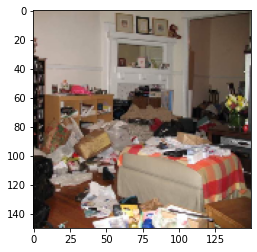

In [171]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')